# **Machine Learning**


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics

In [3]:
# import telecom dataset into a pandas data frame
df_churn20 = pd.read_csv('churn-bigml-20.csv')
df_churn80 = pd.read_csv('churn-bigml-80.csv')

In [4]:
# merging two csv files
df = pd.concat(
    map(pd.read_csv, ['churn-bigml-20.csv', 'churn-bigml-80.csv']), ignore_index=True)
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3329,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3330,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3331,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [5]:

# saving the dataframe
df.to_csv('churncombo.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [7]:
# Area code to be treated as categorical feature because we don't perform arithmetic calculations on pincodes
df['Area code'] = df['Area code'].astype('object')

In [8]:
# Use Dataframe.dtypes to give 
# data type of 'Area code' column as result
print(df.dtypes['Area code'])

object


# Feature importance

**Mutual information — analysis of linear and nonlinear relationships**

In machine learning, we are interested in evaluating the degree of dependency between each independent variable and the response variable. Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target. The target here is the churn response.

In [9]:
# select categorial variables excluding the response variable
categorical_variables = df.select_dtypes(include=object)
categorical_variables

,State,Area code,International plan,Voice mail plan
0,LA,408,No,No
1,IN,415,No,No
2,NY,415,No,No
3,SC,415,No,No
4,HI,510,No,No
...,...,...,...,...
3328,SC,415,No,No
3329,AZ,415,No,Yes
3330,WV,415,No,No
3331,RI,510,No,No


In [10]:
from sklearn.metrics import mutual_info_score

# function that computes the mutual infomation score between a categorical series and the column Churn
def compute_mutual_information(categorical_series):
    return mutual_info_score(categorical_series, df.Churn)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

International plan    0.025563
State                 0.012479
Voice mail plan       0.005695
Area code             0.000027
dtype: float64


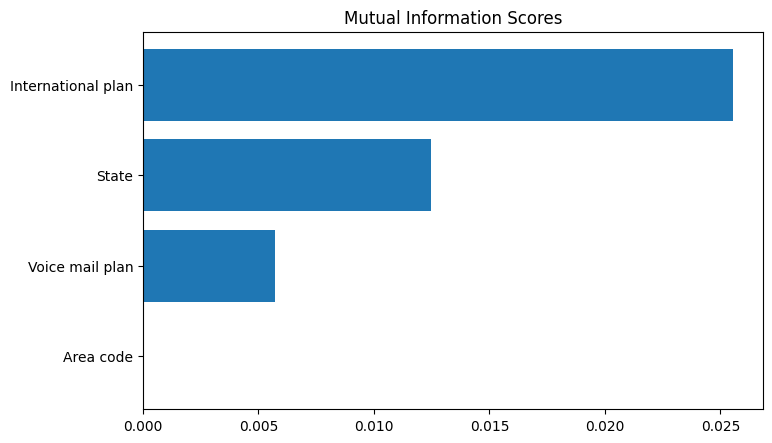

In [11]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    ax = plt.barh(width, scores)
    
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(feature_importance)


Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target. As shown above, only Area code has a mutual information score really close to 0, meaning it does not have a strong relationship with Churn.

In the following steps, we should consider removing the variable 'Area code' from the data set before training as it does not provide useful information for predicting the outcome.

In [12]:
 # drop the Area code column from the dataset
df_new = df.drop('Area code', axis=1)

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   International plan      3333 non-null   object 
 3   Voice mail plan         3333 non-null   object 
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [14]:
# atrip leading and trailing spaces
df_new.columns = df_new.columns.str.strip()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   International plan      3333 non-null   object 
 3   Voice mail plan         3333 non-null   object 
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [15]:
df_new['Churn'] = df_new['Churn'].map({True: 'True', False: 'False'})  # Replace boolean by string
df_new.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   International plan      3333 non-null   object 
 3   Voice mail plan         3333 non-null   object 
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total day charge        3333 non-null   float64
 8   Total eve minutes       3333 non-null   float64
 9   Total eve calls         3333 non-null   int64  
 10  Total eve charge        3333 non-null   float64
 11  Total night minutes     3333 non-null   float64
 12  Total night calls       3333 non-null   int64  
 13  Total night charge      3333 non-null   float64
 14  Total intl minutes      3333 non-null   

In [16]:
# strip leading and trailing spaces from the entire column
df_new['Churn'] = df_new['Churn'].str.strip()

# Feature Engineering

Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model. In this project, we need to transform both numerical and categorical variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale. This will prevent that the columns with large values dominate the learning process.

**Label Encoding**

Label encoding is used to replace categorical values with numerical values. This encoding replaces every category with a numerical label. In this project, we use label encoding with the following binary variables: (1) International plan, (2) Voice mail plan, (3) Churn.

In [17]:
df_telco_transformed = df_new.copy()

# label encoding (binary variables)
label_encoding_columns = ['International plan', 'Voice mail plan', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'International plan' or column == 'Voice mail plan':
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No': 0})
    else: 
        df_telco_transformed[column] = df_telco_transformed[column].map({'True': 1, 'False': 0}) 

In [18]:
df_telco_transformed

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
2,NY,161,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
3,SC,111,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,SC,79,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
3329,AZ,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3330,WV,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3331,RI,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


**Normalization**

In this project, we will use the min-max method to rescale the numeric columns to a common scale. The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [19]:
# min-max normalization (numeric variables)
min_max_columns = df_telco_transformed.loc[:, ~df_telco_transformed.columns.isin(['State', 'Churn'])]

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_telco_transformed[column].min()
        # maximum value of the column
        max_column = df_telco_transformed[column].max()
        # min max scaler
        df_telco_transformed[column] = (df_telco_transformed[column] - min_column) / (max_column - min_column)   


In [20]:
df_telco_transformed

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,0.479339,0.0,0.0,0.000000,0.525941,0.587879,0.525989,0.966731,0.470588,0.967001,0.518020,0.401408,0.518231,0.435,0.20,0.435185,0.111111,0
1,IN,0.264463,0.0,0.0,0.000000,0.368016,0.830303,0.368042,0.628265,0.488235,0.628276,0.499193,0.549296,0.499701,0.635,0.30,0.635185,0.444444,1
2,NY,0.661157,0.0,0.0,0.000000,0.948974,0.406061,0.948860,0.873797,0.570588,0.873827,0.369554,0.669014,0.369994,0.270,0.45,0.270370,0.444444,1
3,SC,0.454545,0.0,0.0,0.000000,0.314709,0.624242,0.314722,0.377509,0.600000,0.377548,0.447552,0.507042,0.447699,0.385,0.30,0.385185,0.222222,0
4,HI,0.198347,0.0,0.0,0.000000,0.340080,0.709091,0.340040,0.591422,0.641176,0.591394,0.418236,0.401408,0.418410,0.555,0.05,0.555556,0.111111,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,SC,0.322314,0.0,0.0,0.000000,0.383979,0.593939,0.383970,0.521584,0.400000,0.521514,0.533082,0.669014,0.533174,0.590,0.25,0.590741,0.222222,0
3329,AZ,0.789256,0.0,1.0,0.705882,0.445268,0.466667,0.445171,0.592521,0.741176,0.592688,0.688273,0.352113,0.688583,0.495,0.30,0.494444,0.222222,0
3330,WV,0.276860,0.0,0.0,0.000000,0.658780,0.345455,0.658786,0.421776,0.323529,0.421870,0.452125,0.633803,0.452481,0.480,0.20,0.479630,0.333333,0
3331,RI,0.111570,0.0,0.0,0.000000,0.515393,0.660606,0.515426,0.794061,0.341176,0.794241,0.453739,0.408451,0.454274,0.705,0.30,0.705556,0.222222,0


# Setting a baseline

In machine learning, we often use a simple classifier called baseline to evaluate the performance of a model. Here, the rate of customers that did not churn (most frequent class) can be used as a baseline to evaluate the quality of the models generated. These models should outperform the baseline capabilities to be considered for future predictions.

# Splitting the data in training and testing sets

The first step when building a model is to split the data into two groups, which are typically referred to as training and testing sets. The training set is used by the machine learning algorithm to build the model. The test set contains samples that are not part of the learning process and is used to evaluate the model’s performance. It is important to assess the quality of the model using unseen data to guarantee an objective evaluation.

First, we create a variable X to store the independent attributes of the dataset. Additionally, we create a variable y to store only the target variable (Churn).

In [21]:
# select independent variables
X = df_telco_transformed.drop(columns=['Churn','State'])

# select dependent variables
y = df_telco_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')
Churn


Then, we can use the train_test_split function from the sklearn.model_selection package to create both the training and testing sets.

In [22]:
from sklearn.model_selection import train_test_split


# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)

# Assessing multiple algorithms

Algorithm selection is a key challenge in any machine learning project since there is not an algorithm that is the best across all projects. Generally, we need to evaluate a set of potential candidates and select for further evaluation those that provide better performance.

In this project, we compare 7 different algorithms, all of them already implemented in Scikit-Learn.



*   Logistic Regression
*   Support Vector Machines
*   Decision Tree
*   Random Forest
*   K Nearest Neighbours
*   Dummy Classifier
*   Gradient Boosting









 **Logistic Regression**

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [24]:
# Feature Scaling
sc = StandardScaler()              # feature scaling function
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
# Fitting logistic regression to the training set
Classifier = LogisticRegression(random_state=0)      # We are creating logistic regression object
Classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [26]:
# Predicting the test results
y_pred = Classifier.predict(X_test)
print("Accuracy score of Logistic Regression: ", accuracy_score(y_test, y_pred))

Accuracy score of Logistic Regression:  0.8525179856115108


**Support Vector Machines**

In [27]:
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear')     # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for the test dataset
y_pred = clf.predict(X_test)

In [28]:
from sklearn import metrics

print("Accuracy score of SVM : ", metrics.accuracy_score(y_test, y_pred))

Accuracy score of SVM :  0.8537170263788969


**Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_predict = tree.predict(X_test)
tree_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of Decision Tree = {} '.format(tree_accuracy))

Accuracy of Decision Tree = 0.934052757793765 


**Random Forest**

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
rf = RandomForestClassifier(n_estimators=100,
                            max_depth=3,
                            max_features='auto',
                            min_samples_leaf=4,
                            bootstrap=True,
                            n_jobs=-1,
                            random_state=0)

rf.fit(X_train, y_train )

RandomForestClassifier(max_depth=3, min_samples_leaf=4, n_jobs=-1,
                       random_state=0)

In [32]:
y_pred=rf.predict(X_test)

In [33]:
print("Accuracy score of Random Forest: ", accuracy_score(y_test, y_pred))

Accuracy score of Random Forest:  0.8788968824940048


**K Nearest Neighbours**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
knn_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of KNN = {} '.format(knn_accuracy))

Accuracy of KNN = 0.9004796163069544 


**Dummy Classifier**

In [35]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train, y_train)
y_predict = dummy.predict(X_test)
dummy_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of dummy = {} '.format(dummy_accuracy))

Accuracy of dummy = 0.8537170263788969 


**Gradient Boosting**

In [36]:
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [37]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.1)
gradient_booster.fit(X_train,y_train)
y_predict = gradient_booster.predict(X_test)
gradientbooster_accuracy = metrics.accuracy_score(y_test, y_predict)
print('Accuracy of gradient boosting = {} '.format(gradientbooster_accuracy))

Accuracy of gradient boosting = 0.9568345323741008 


In [46]:
gba = gradientbooster_accuracy
gba

0.9568345323741008

# Conclusion

The **Gradient Boosting model** shows the **highest accuracy** of nearly 96% (10% higher than the baseline).


# Hyperparameter tuning

There are multiple techniques to find the best hyperparameters for a model. The most popular methods are (1) grid search, (2) random search, and (3) bayesian optimization. Grid search test all combinations of hyperparameters and select the best performing one. It is a really time-consuming method, particularly when the number of hyperparameters and values to try are really high.

In random search, you specify a grid of hyperparameters, and random combinations are selected where each combination of hyperparameters has an equal chance of being sampled. We do not analyze all combinations of hyperparameters, but only random samples of those combinations. This approach is much more computationally efficient than trying all combinations

**Hyperparameter Tuning using Random Search**

We specify the grid of hyperparameter values using a dictionary (grid_parameters) where the keys represent the hyperparameters and the values are the set of options we want to evaluate. Then, we define the RandomizedSearchCV object for trying different random combinations from this grid. The number of hyperparameter combinations that are sampled is defined in the n_iter parameter.

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}



# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 115, 'min_samples_split': 3, 'max_features': 'log2', 'max_depth': 6}


After fitting the grid object, we can obtain the best hyperparameters using best_params_attribute. As you can above, the **best hyperparameters** are: **{‘n_estimators’: 120, ‘min_samples_split’: 3, ‘max_features’: ‘log2’, ‘max_depth’: 5}.**


# Performace of the model

The last step of the machine learning process is to check the performance of the model (best hyperparameters ) by using the confusion matrix and some evaluation metrics.

**Confusion matrix**


Now that the model is trained, it is time to evaluate its performance using the testing set. First, we use the previous model (gradient boosting classifier with best hyperparameters) to predict the class labels of the testing data (with the predict method). Then, we construct the confusion matrix.

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[707,   5],
       [ 33,  89]])

As shown above, 794 observations of the testing data were correctly classified by the model (706 true negatives and 88 true positives). On the contrary, we can observe 40 misclassifications (6 false positives and 34 false negatives).

**Evaluation metrics**

Evaluating the quality of the model is a fundamental part of the machine learning process.

In [42]:
# print classification report 
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       712
           1       0.95      0.73      0.82       122

    accuracy                           0.95       834
   macro avg       0.95      0.86      0.90       834
weighted avg       0.95      0.95      0.95       834



The classification report contains the precision, sensitivity, f1-score, and support (number of samples) achieved for each class.

As shown above, we obtain a sensitivity of 0.72 and a specificity of 0.99. The model obtained predicts more accurately customers that do not churn. 

In [43]:
# print the accuracy of the model
hyp_accu = accuracy_score(y_test, random_search_predictions)
hyp_accu

0.9544364508393285

In [47]:
diff = (gba) - (hyp_accu)
print(diff)

0.0023980815347722784


Conclusion : Hyperparameter tuning has barely decreased the accuracy of the model.